In [41]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import os

In [42]:
# Load data
if os.path.exists('Titanic-Dataset.csv'):
    df = pd.read_csv('Titanic-Dataset.csv')
else:
    print("Downloaded file")
    df = pd.read_csv('https://raw.githubusercontent.com/KalleLahtinen/joda2024/main/10_lines/Titanic-Dataset.csv')
    df.to_csv('Titanic-Dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
# Calculate the median of the 'Age' column, excluding NaN values
age_median = df['Age'].median()

# Fill NaN values in the 'Age' column with the calculated median
df['Age'] = df['Age'].fillna(age_median)

# Check if there are any NaN values left in the 'Age' column
print(df['Age'].isnull().sum())

0


In [44]:
# Drop (2) rows where 'Embarked' is null
df = df.dropna(subset=['Embarked'])

# Encode 'Sex' with label encoding: female=1, male=0
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

# One-hot encode 'Embarked' with dummy variables
# drop_first=True to avoid dummy variable trap
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)

# Drop unnecessary variables
# 'Cabin' is dropped due to high missing values,
# 'Ticket' and 'Name' are dropped as they require complex feature engineering to be useful,
# 'Embarked' is dropped because we have encoded it
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

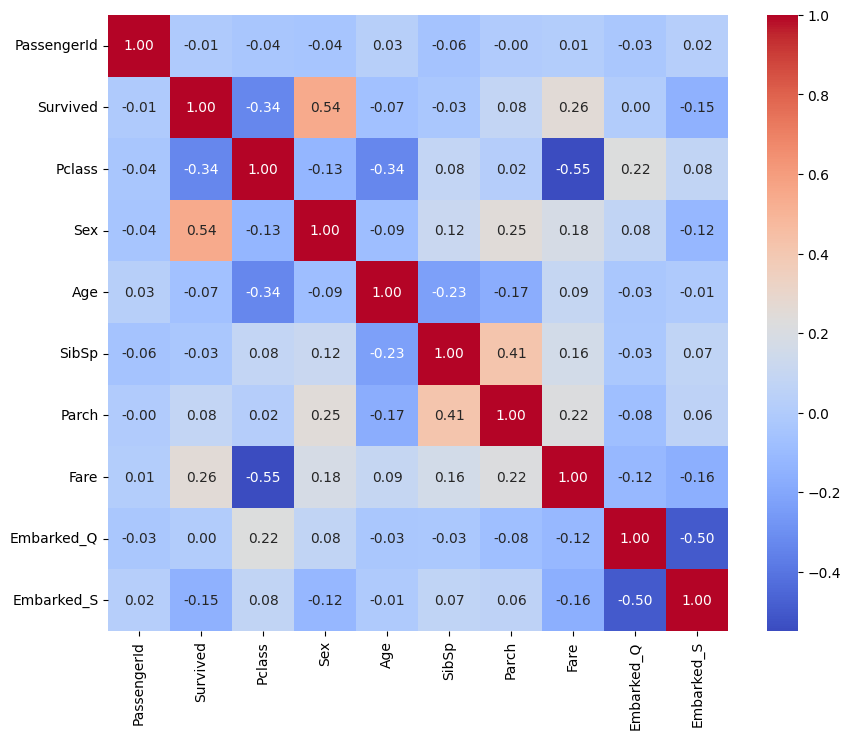

In [45]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of the correlation matrix with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

# This heatmap includes correlations across all numerical features, highlighting how each is related to the others.
# Specifically, look at the 'Survived' row/column to see how other numerical features correlate with survival.


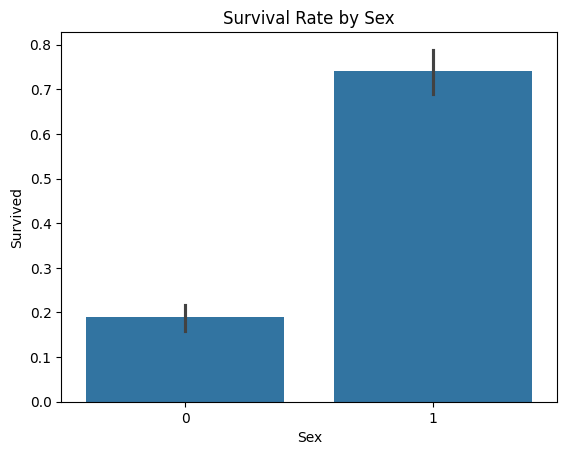

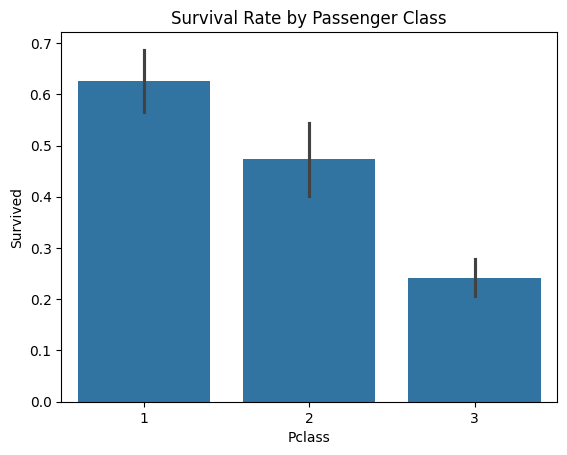

ValueError: Could not interpret value `Embarked` for `x`. An entry with this name does not appear in `data`.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.show()


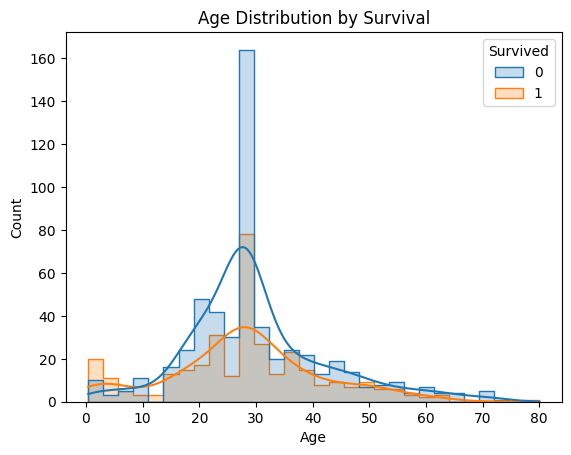

In [47]:
# Age distribution of survivors vs. non-survivors
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.show()

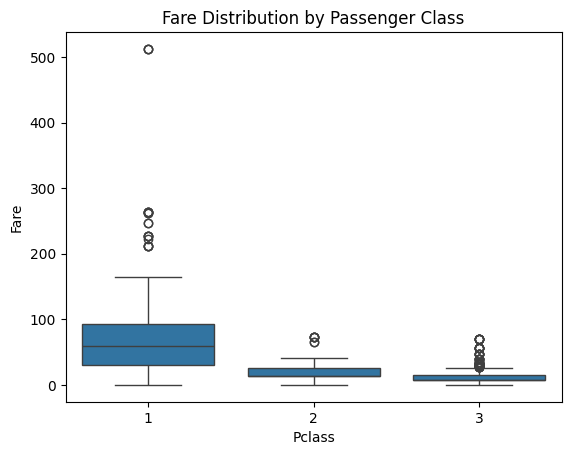

In [48]:
# Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()
